<a href="https://colab.research.google.com/github/IsraelAbebe/Personal-Projects-and-Exercises/blob/master/AIMS-Assignments/Deep-Learning/Auto_Encoder_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import FashionMNIST
from matplotlib import pyplot as plt

In [0]:
# Convert vector to image
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.view(x.size(0), 28, 28)
    return x

In [3]:
bs = 1000

transform = transforms.Compose([transforms.ToTensor()])

traindataset = FashionMNIST('./data', download=True, train=True, transform=transform)
testdataset = FashionMNIST('./data', download=True, train=False, transform=transform)

# Loaders
trainloader = torch.utils.data.DataLoader(traindataset, batch_size=bs, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testdataset, batch_size=bs, shuffle=False, num_workers=4)


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


In [0]:
# Displaying routine
def display_images(in_, out, n=1):
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')

In [0]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
        nn.Linear(28*28, 100),
        nn.ReLU())
        
        self.decoder = nn.Sequential(
        nn.Linear(100, 28*28),
        nn.ReLU())
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
model_ae = AutoEncoder()

In [0]:
# Configure the optimiszer and criterion
learning_rate = 1e-3

optimizer = torch.optim.Adam(model_ae.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

epoch [1/10], loss:0.0418
epoch [2/10], loss:0.0289
epoch [3/10], loss:0.0243
epoch [4/10], loss:0.0222
epoch [5/10], loss:0.0209
epoch [6/10], loss:0.0197
epoch [7/10], loss:0.0183
epoch [8/10], loss:0.0178
epoch [9/10], loss:0.0173
epoch [10/10], loss:0.0165


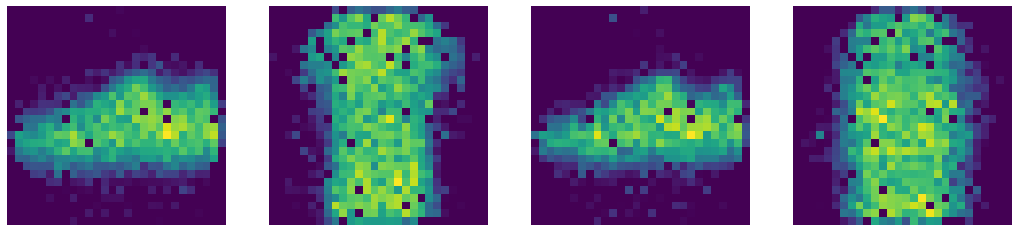

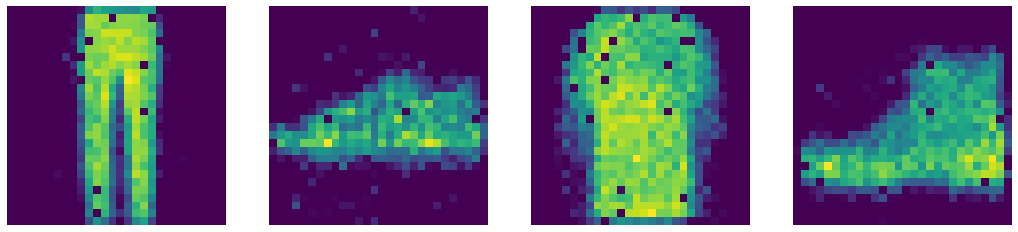

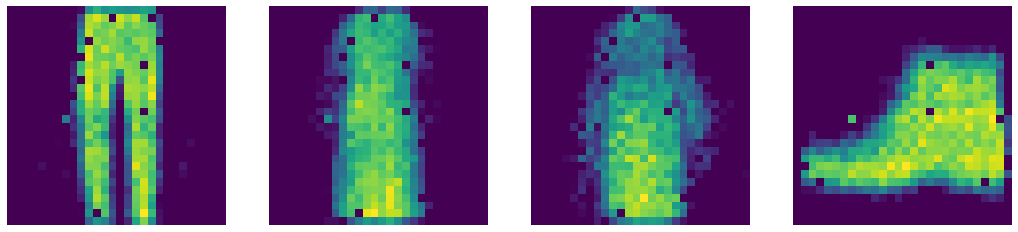

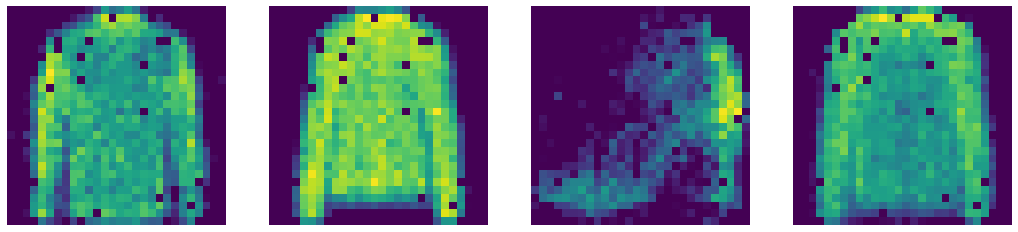

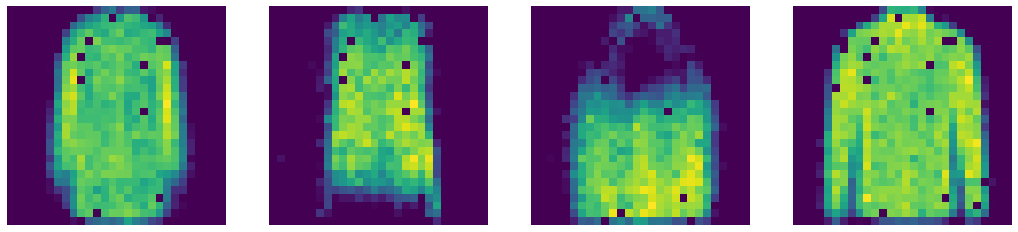

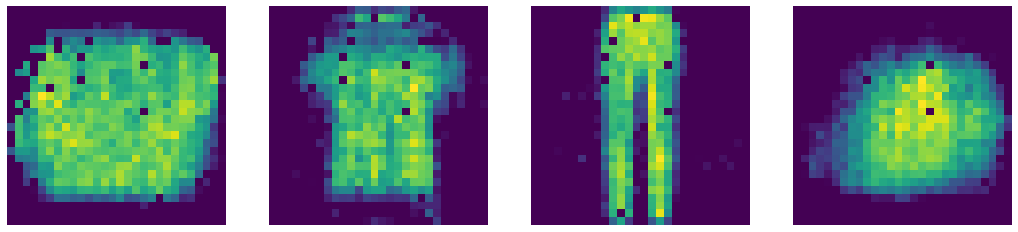

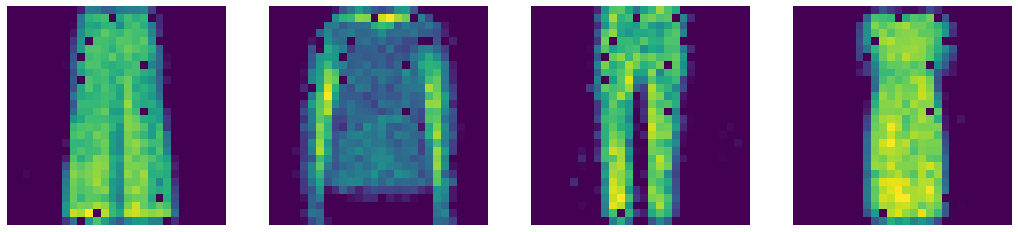

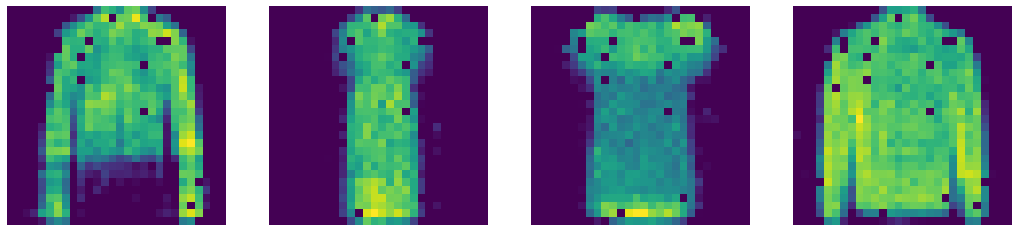

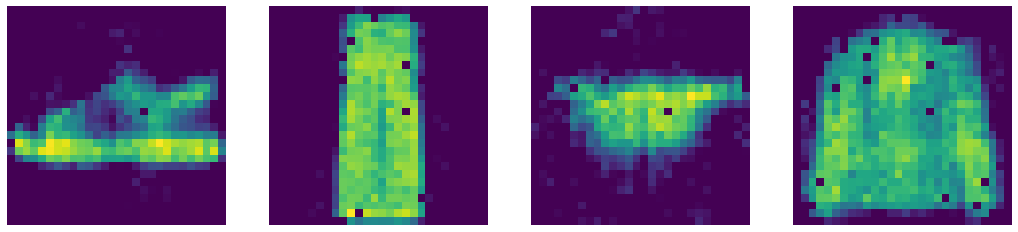

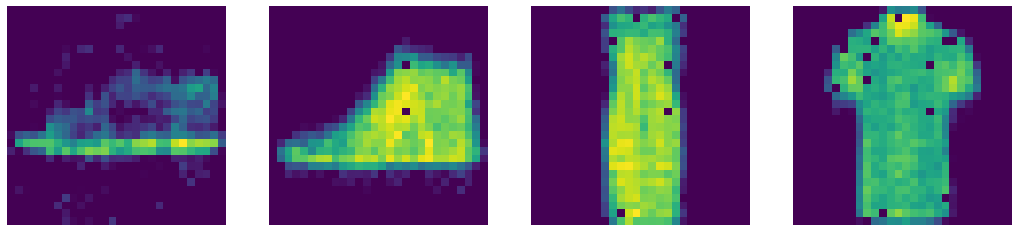

In [25]:
num_epochs = 10

for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        img.requires_grad_()
        img = img.view(img.size(0), -1)
        output = model_ae(img)  
        loss = criterion(output, img.data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)

In [0]:
from torch.autograd import Variable
plt.style.use('default')
%matplotlib inline 

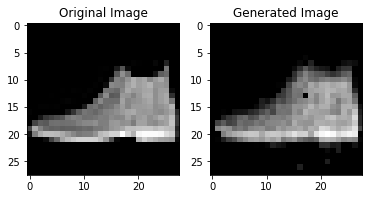

In [27]:
test_images, labels = next(iter(testloader))

test_images = Variable(test_images.view(test_images.size()[0], -1))
test_output = model_ae(test_images)
  
inp = test_images.view(-1, 28, 28)
out = test_output.view(-1, 28, 28)

fig = plt.figure()
plot = fig.add_subplot(1, 2, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 2, 2)
plot.set_title('Generated Image')
imgplot = plt.imshow(out[0].cpu().detach(), cmap='gray')
plt.show()

# Exercises

Your exercise should you choose to accept, is to 

1. change the model class to use Convolution Layers and re-run with the same training code in cells below.
2. Edit the code above for denoising autoencoder? (bonus point if your code it)
3. Briefly describe the performance of using the fully connected auto-encoder to the CNN_Autoencoder

Deadline: Today: 2:pm

In [0]:
def get_shape(h,p=0,k=3,s=1):
    '''
    h: height or width of the input image
    p: paddign . 0 means no padding
    k: kernel size
    s: stride to shift kernels 
    
    --------------------
    return : size of image after applying either maxpooling or convolution
    
    '''
    return ((h+(2*p)-k)/s)+1

In [29]:
get_shape(26)

24.0

In [0]:
class AutoEncoderConv(nn.Module):
    def __init__(self):
        super(AutoEncoderConv, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1,32,kernel_size=(3,3),stride=1),
            nn.ReLU(),
            nn.Conv2d(32,32,kernel_size=(3,3),stride=1),
            nn.ReLU(),
            nn.Conv2d(32,32,kernel_size=(3,3),stride=1),
            nn.ReLU())
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32,32,kernel_size=(3,3),stride=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32,32,kernel_size=(3,3),stride=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32,1,kernel_size=(3,3),stride=1),
            nn.ReLU())
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
model_ae_conv = AutoEncoderConv()

In [0]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_ae_conv = model_ae_conv.to(device)

In [0]:
# Configure the optimiszer and criterion
learning_rate = 1e-3

optimizer = torch.optim.Adam(model_ae_conv.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

epoch [1/10], loss:0.0084
epoch [2/10], loss:0.0035
epoch [3/10], loss:0.0024
epoch [4/10], loss:0.0013
epoch [5/10], loss:0.0011
epoch [6/10], loss:0.0008
epoch [7/10], loss:0.0008
epoch [8/10], loss:0.0007
epoch [9/10], loss:0.0008
epoch [10/10], loss:0.0005


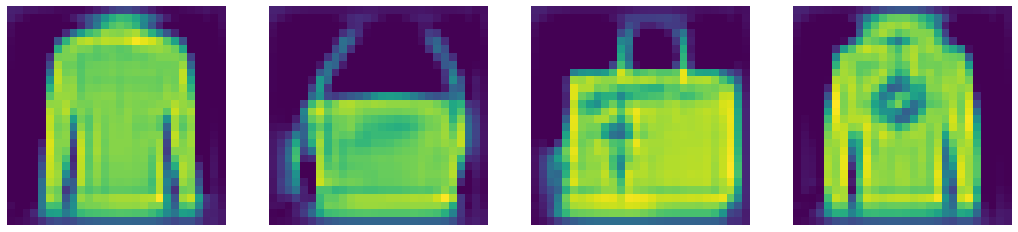

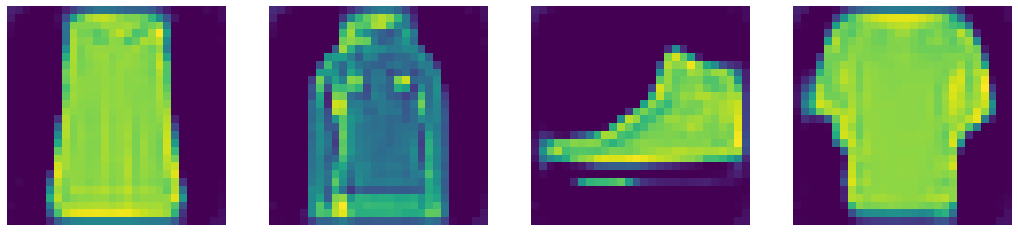

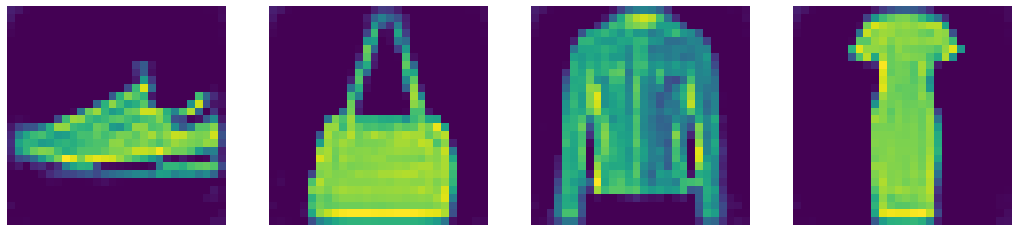

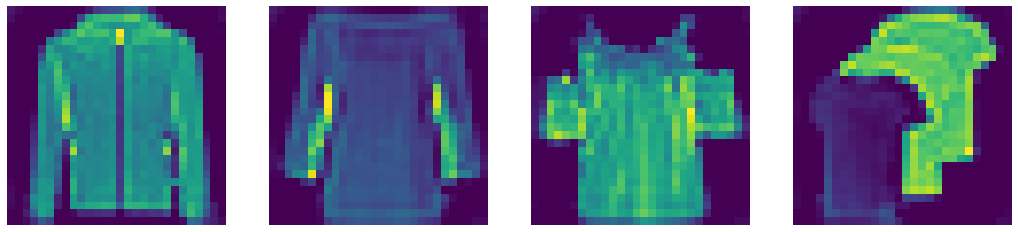

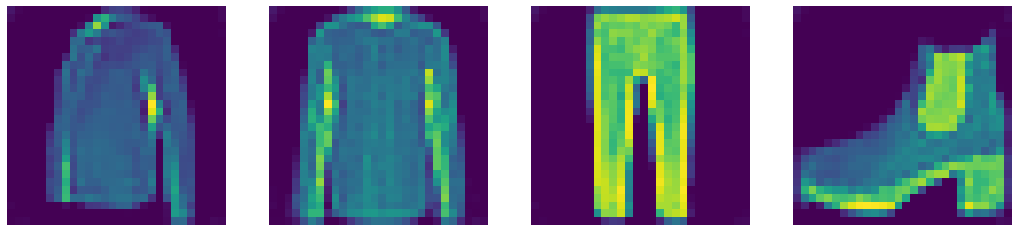

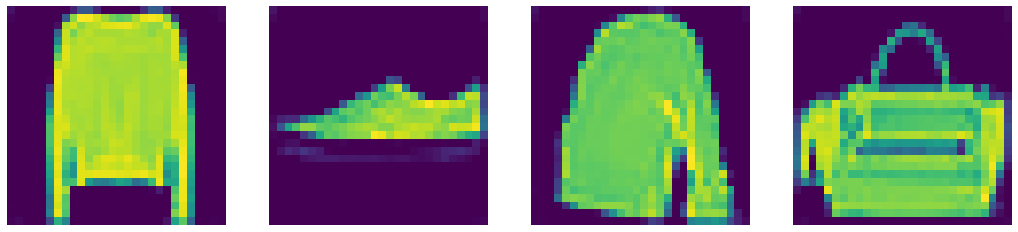

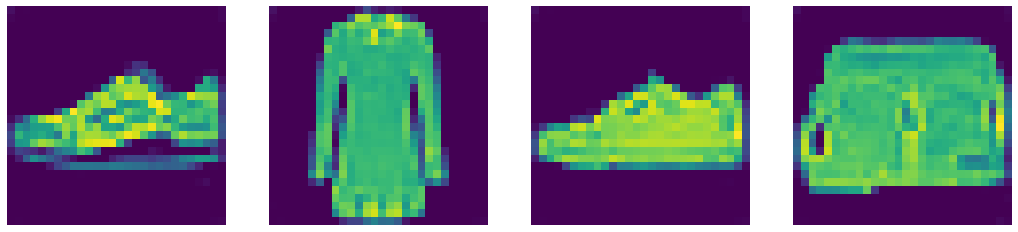

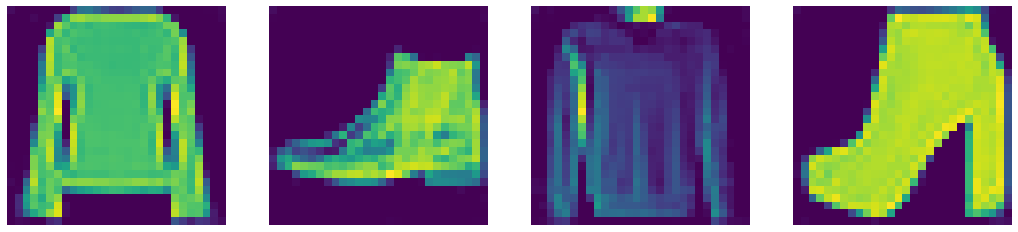

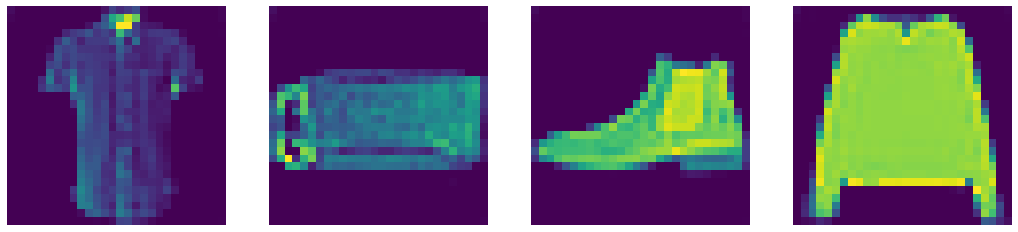

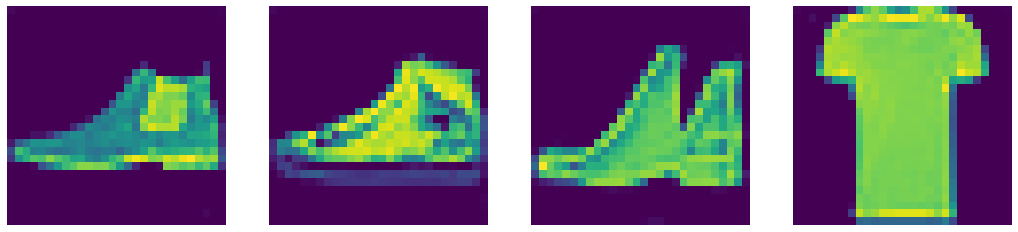

In [165]:
num_epochs = 10

for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        img = img.to(device)
        img.requires_grad_()
        output = model_ae_conv(img)  
        loss = criterion(output, img.data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)

In [0]:
from torch.autograd import Variable
plt.style.use('default')
%matplotlib inline 

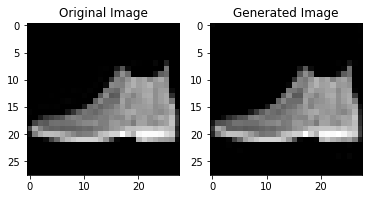

In [167]:
test_images, labels = next(iter(testloader))

test_images = test_images.to(device)

test_images = Variable(test_images)
test_output = model_ae_conv(test_images)
  
inp = test_images
out = test_output

fig = plt.figure()
plot = fig.add_subplot(1, 2, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0][0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 2, 2)
plot.set_title('Generated Image')
imgplot = plt.imshow(out[0][0].cpu().detach(), cmap='gray')
plt.show()